# DSCI Project Planning Stage

## 1) Summary of Players Data Set

### Data Set 1 (players)

##### Number of observations: 
196

##### Number of variables: 
7

##### Name and type of variables: 
- experience, character	
- subscribe, logical
- hashedEmail, character	
- played_hours, double
- name, character
- gender, character
- Age, double

##### What the variables mean:
- experience = the players level of experience with the game
- subscribe	= if the player is subscribed to the game or not
- hashedEmail = string of numbers identifying each player
- played_hours = the number of hours the player has spent palying the game
- name = the players first name
- gender = the gender the player identifies with (male, female, non-binary etc.)
- Age = the age of the player

##### Issues you see in the data: 
The columns in the data set for gender and Age are not formatted as the best data type.

##### Potential issues related to things you cannot directly see: 
When you enter the game and fill in your information, there are automatically generated names for each player to choose. With this, multiple players might have the same name, which could be confusing. There could also be NA values in the table.

##### How the data were collected:
The data was collected from a Minecraft survey that users are prompted with when they enter the game.


## 2) Question

##### Broad Question: 
Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts?

##### Specific Question: 
Can a players age predict the experience level of the player in the player's data set?

##### How the data will address the question of interest. 

The specific question addresses the broader question since the experience level of players likely correlates with greater amounts of time spent playing the game and thus contributes greater amounts of data. The data from the Players data set will help address the specific question as it includes age and experience level, which can be compared to discover trends and relationships between these variables. 


# Method

#### Loading The Data Into R

In [7]:
library(tidyverse)
library(tidymodels)
library(repr)

url <- "https://raw.githubusercontent.com/ArabellaKel/DSCI_project/refs/heads/main/players_DSCIproject.csv" 

players_data <- read_csv(url)

head(players_data)
tail(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


#### Summary Statistics

In [8]:
library(tidyverse)
library(tidymodels)

players_statistics <- players_data |>
summarize (max_played_hours = max(played_hours),
           min_plyed_hours = min(played_hours),
           mean_plyed_hours = mean(played_hours),
           max_age = max(Age, na.rm = TRUE),
           min_age = min(Age, na.rm = TRUE), mean_age = mean(Age, na.rm = TRUE))
           
players_statistics


max_played_hours,min_plyed_hours,mean_plyed_hours,max_age,min_age,mean_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,5.845918,50,8,20.52062


#### Tidying Data and Creating Visualizations

In [9]:
library(lubridate)

#tidy data 
players_tidy <- players_data |>
    mutate ( Age = as.integer(Age),
            gender = as.factor(gender),
           experience = as.factor(experience))

head(players_tidy)
tail(players_tidy)


players_mean <- players_tidy |>
summarize (mean_played_hours = mean(played_hours),
           mean_age = mean(Age, na.rm = TRUE))

players_mean


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<int>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


#### Visualizations

Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


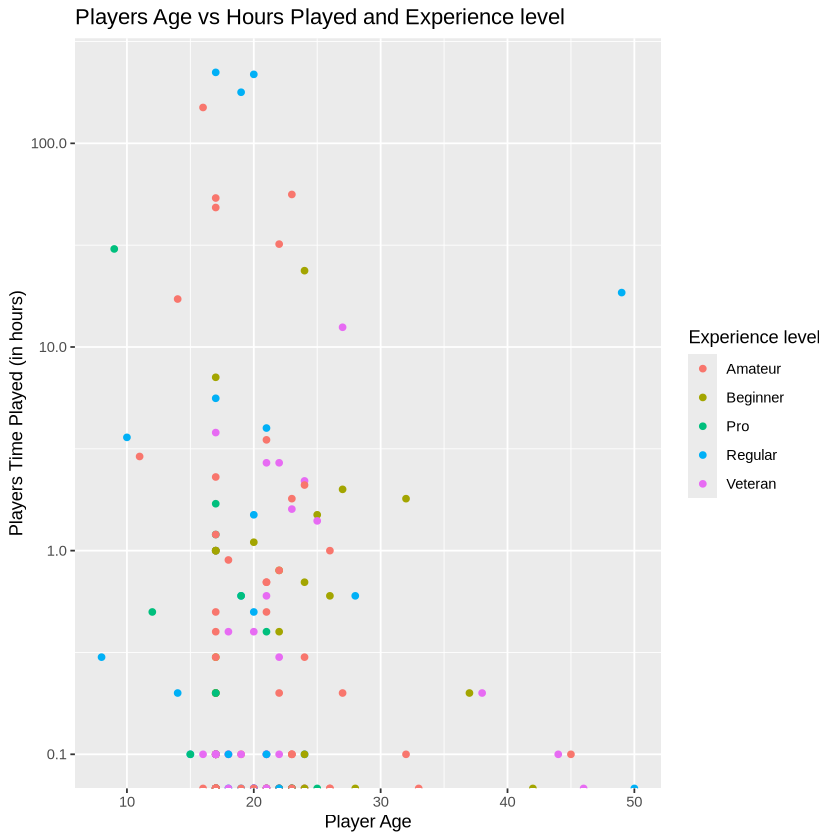

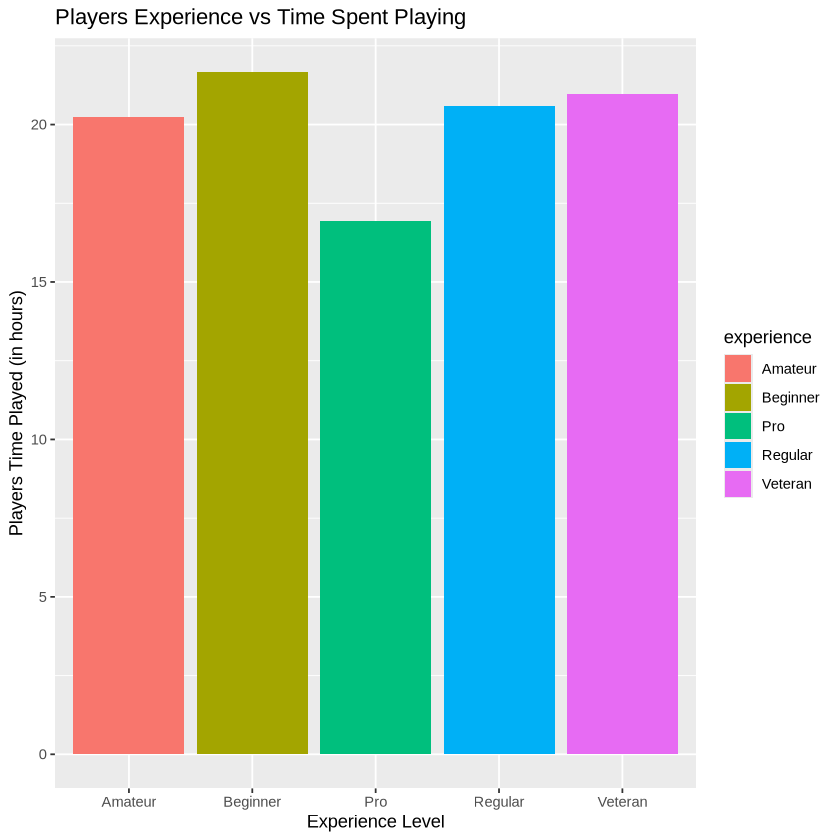

In [6]:
players_tidy_mean <- players_tidy |>
group_by(experience) |>
summarize(mean_age = mean(Age, na.rm = TRUE))

players_plot_1 <- players_tidy |>
ggplot(aes(x = Age, y = played_hours, colour = experience))+
       geom_point() +
       labs(x = "Player Age", y = "Players Time Played (in hours)" , colour = "Experience level", title = "Players Age vs Hours Played and Experience level") +
    scale_y_log10(labels = comma)

players_plot_1

players_plot_2 <- players_tidy_mean |> 
ggplot(aes(x = experience, y = mean_age, fill = experience))+
       geom_bar(stat="identity") +
       labs(x = "Experience Level", y = "Players Time Played (in hours)", title = "Players Experience vs Time Spent Playing") 
    
players_plot_2

#### Relevant Insights From The Plots

From the first scatter plot, there are no specific trends related to age and experience level, however, there is a negative relationship between 
age and time spent playing the game. This is because the graph clearly shows more people between the ages of 10 and 30 spend much more time playing the game than players of other ages, the most hours played being around the age of 20.

The second bar plot highlights that the most accumulation of hours playing the game comes from players of regular experience. Veterans seem to have the lowest accumulation of hours, signifying that there are probably not a lot of players who are veterans, and therefor do not have a lot of data to asses. This could be because regular is the default experience setting and most players choose not to change it once they have made their account.

# 4) Methods and Plan

The method to best address my question of interest would be to create a K nearest classification model to categorize the players experience level based on age as the classifer. 

##### Why is this method appropriate?
This method is appropriate as the trends in data are not linear in nature, so using a non linear method is more applicable to these variables. In comparison to regression, experience level is a class not a numerical variable when used as a classifier so regression would not be effective.

##### Which assumptions are required, if any, to apply the method selected?
This model assumes that there are enough data observations to draw effective conclusions, the data does not contain severe biases, and that there is a correlation between age and experience level of players.

##### What are the potential limitations or weaknesses of the method selected?
A limitation may be that the data is quite scattered, causing small variations in the training data used to have a large impact on the classification outcomes. Additionally, if age does not appear to be a stong predictor for experience, the model will struggle to make accurate classifications.

##### How are you going to compare and select the model?
When creating the model, I would use cross validation with k-folds to select the best number of neighbors and reduce bias. I would also evaluate the performance metrics such as sccuracy, precision, and recall of the model to make improvements. I could even create multiple modles and compare each one to determine the best classification strategy.

##### How are you going to process the data to apply the model? 
The data will be preprocessed to check for missing values or issues before any analyses is conducted. The dataset will be split into training (70%), validation (15%), and test (15%) sets to ensure proper evaluation is used. Within the training set, k-fold cross-validation will be used to tune the parameters of the model.